# 4th Gen Infiniti Academy Data Challenge - Legal

Given a data set from a legal company. Refer to Variables definitions.

### Objectives from the data analysis
- How to forecast revenues for the year?
- Strategies to adopt to reach revenue targets
- Performance in meeting the KPI
- Types of cases that brings in the most revenues
    - If there is any, who can take the case/ is there a distinction in skillsets/domain of each lawyers?
- How productive are the lawyers?
    - Does time correlate with their apportioned amount? 

### Variables definitions
- Apportionment
    - The legal term apportionment, also called delimitation, is in general the distribution or allotment of proper shares, though may have different meanings in different contexts. Apportionment can refer to estate, the amount of compensation received by a worker and in respect of time.
- Final Apportionment Amount
    - Revenue earned by each lawyer
- Case Type
    - Unable to provide further details - confidential
- Hours
    - Billable time clocked by each lawyer
    - Daily target = 10 hours (value 1 is equivalent to 10 hours)
- Cost to Company (CTC)
    - Cost to Company (CTC) is the yearly expenditure that a company spends on an employee. Each employee spend depends on their salary and variable.
    - CTC = Gross Salary + Other Benefits
    - In this dataset, CTC = Monthly Salary
        - Revenue targets are calculated based on multipliers of their salary

## 1. Importing Data and Data Pre-Processing

In [16]:
# importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')
sns.set_context('notebook')

In [17]:
# Importing the data from xlsx files using pandas
apportionment = pd.read_excel('data.xlsx', sheet_name = 'Apportionment', parse_dates = True)
hours = pd.read_excel('data.xlsx', sheet_name = 'Hours', parse_dates = True)
ctc = pd.read_excel('data.xlsx', sheet_name = 'Cost to Company')


Printing the heads of each dataframe to see what we will be working with

In [18]:
# Prints the apportionment table
apportionment.head()

,Date of Invoice,Case Type,Status,User,Final Apportioned Amount,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,03-02-2022,Outgoing Work,Awaiting Payment,Lawyer A,250.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03-02-2022,Outgoing Work,Awaiting Payment,Lawyer A,250.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04-02-2022,Incoming Work,Paid,Lawyer A,160.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04-02-2022,Outgoing Work,Awaiting Payment,Lawyer A,84.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05-01-2022,Protection,Paid,Lawyer A,74.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Prints the hours table
hours.head()

,Date,User/Full Name,Actual Hours
0,2022-06-30,Lawyer A,0.6667
1,2022-06-30,Lawyer A,0.2000
2,2022-06-30,Lawyer A,0.1333
3,2022-06-30,Lawyer A,0.3667
4,2022-06-30,Lawyer A,0.5833


In [48]:
# Prints the cost to company table
ctc

,User,Mthly 1X,Mthly 2X,Mthly 3X,Mthly 4X
0,Lawyer A,3600.00,7200.00,10800.00,14400.00
1,Lawyer B,6284.43,12568.86,18853.29,25137.72
2,Lawyer C,7320.00,14640.00,21960.00,29280.00
3,Lawyer D,6284.43,12568.86,18853.29,25137.72
4,Lawyer E,7320.00,14640.00,21960.00,29280.00
5,Lawyer F,10308.75,20617.50,30926.25,41235.00
6,Lawyer G,5699.43,11398.86,17098.29,22797.72


First few things we can see are:
- date format in `apportionment['Date of Invoice']` table is not in YYYY/MM/DD format. Need to be consistent with the `hours[Date]` format in case we have the need to merge both tables.
- `Unnamed` columns in `apportionment` table

What may not be obvious is whether there are any missing values.

In [21]:
# Removing the unnamed columns in the apportionment table 
apportionment = apportionment.loc[:, ~apportionment.columns.str.contains('^Unnamed')]

# Converting the date into the same format as the date format in hours table
apportionment['Date of Invoice'] = pd.to_datetime(apportionment['Date of Invoice'], dayfirst = True)

apportionment.head()

,Date of Invoice,Case Type,Status,User,Final Apportioned Amount
0,2022-02-03,Outgoing Work,Awaiting Payment,Lawyer A,250.00
1,2022-02-03,Outgoing Work,Awaiting Payment,Lawyer A,250.00
2,2022-02-04,Incoming Work,Paid,Lawyer A,160.13
3,2022-02-04,Outgoing Work,Awaiting Payment,Lawyer A,84.00
4,2022-01-05,Protection,Paid,Lawyer A,74.04


In [22]:
# Checking if there is any missing data
print(apportionment.isna().any())
print(hours.isna().any())
print(ctc.isna().any())


Date of Invoice             True
Case Type                   True
Status                      True
User                        True
Final Apportioned Amount    True
dtype: bool
Date              False
User/Full Name    False
Actual Hours       True
dtype: bool
User        False
Mthly 1X    False
Mthly 2X    False
Mthly 3X    False
Mthly 4X    False
dtype: bool


From the output above, there are some missing values from both `apportionment` and `hours` data. We will drop them using the `dropna()` method.

In [23]:
# Dropping the missing data
apportionment.dropna()
hours.dropna()

,Date,User/Full Name,Actual Hours
0,2022-06-30,Lawyer A,0.6667
1,2022-06-30,Lawyer A,0.2000
2,2022-06-30,Lawyer A,0.1333
3,2022-06-30,Lawyer A,0.3667
4,2022-06-30,Lawyer A,0.5833
...,...,...,...
4855,2022-01-04,Lawyer G,0.7622
4856,2022-01-03,Lawyer G,0.4397
4857,2022-01-03,Lawyer G,3.7603
4858,2022-01-03,Lawyer G,4.8642


Another noticeable feature from the table `hours` is that some rows can be merged together.

In [24]:
hours = hours.groupby(['Date', 'User/Full Name']).agg({'Actual Hours' : 'sum'}).reset_index()
hours.head()

,Date,User/Full Name,Actual Hours
0,2022-01-01,Lawyer C,3.5000
1,2022-01-02,Lawyer C,2.0000
2,2022-01-03,Lawyer A,7.6330
3,2022-01-03,Lawyer B,6.9167
4,2022-01-03,Lawyer C,7.6668


## 2. Exploratory Data Analysis

#### 2.1. Exploring the types of cases
Checking what sort of case types we have, and calling a `describe` method on the final apportioned amount for each of the cases. We will also be plotting a boxplot to visualize the description table.

In [25]:
# Prints out the unique case types using the unique method
apportionment['Case Type'].unique()

array(['Outgoing Work', 'Incoming Work', 'Protection',
       'Grant Supportable', 'Renewals', 'Commercialisation',
       'General Corporate', 'Dispute Resolution', 'Corporate Secretarial',
       'Miscellaneous', 'General Disputes', nan], dtype=object)

In [26]:
# Describes the final apportionment amount per case type
apportionment.groupby('Case Type').agg({'Final Apportioned Amount' : 'describe'})

Final Apportioned Amount                            \
                                         count         mean          std   
Case Type                                                                  
Commercialisation                          6.0  1583.333333  1708.490423   
Corporate Secretarial                     17.0  1203.529412   671.116834   
Dispute Resolution                        20.0  3326.972500  6729.327049   
General Corporate                          8.0  1072.500000  1517.014065   
General Disputes                          16.0  3819.375000  4389.923342   
Grant Supportable                         95.0  2222.868526  2460.961843   
Incoming Work                            143.0   560.552937   970.952618   
Miscellaneous                              3.0   566.666667   700.096034   
Outgoing Work                            203.0   475.408867   790.597331   
Protection                                59.0   645.866949   729.536179   
Renewals                                   5.0   432.000000   328.949810   

                                                                        
                          min       25%       50%        75%       max  
Case Type                                                               
Commercialisation      500.00   712.310   912.690  1375.0000   5000.00  
Corporate Secretarial  119.69   600.000  1554.070  1840.0000   1941.75  
Dispute Resolution     113.67   925.000  1150.000  1625.0000  28000.00  
General Corporate      100.00   115.000   213.945  1438.0275   4000.00  
General Disputes        50.00  1387.500  2583.500  3499.7500  14200.00  
Grant Supportable        0.00   580.360  1414.670  2972.0000  14000.00  
Incoming Work            0.00   166.315   300.000   602.5500   9770.00  
Miscellaneous          126.06   163.030   200.000   786.9700   1373.94  
Outgoing Work           13.12   141.720   250.000   532.0000   8616.89  
Protection               0.00   240.380   400.000   635.0950   3550.00  
Renewals                13.34   286.660   400.000   560.0000    900.00

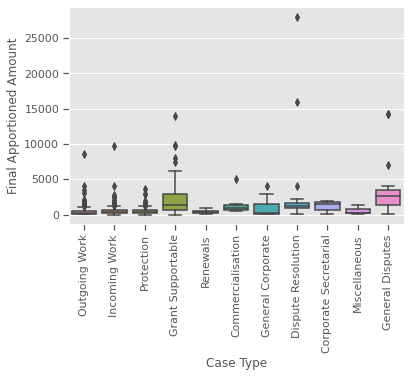

In [27]:
# Plot to show the apportionment amount per case types
sns.boxplot( data = apportionment, x = 'Case Type', y = 'Final Apportioned Amount')
plt.xticks(rotation = 90)
plt.show()

Now what if we would like to see this with respect to each lawyers?

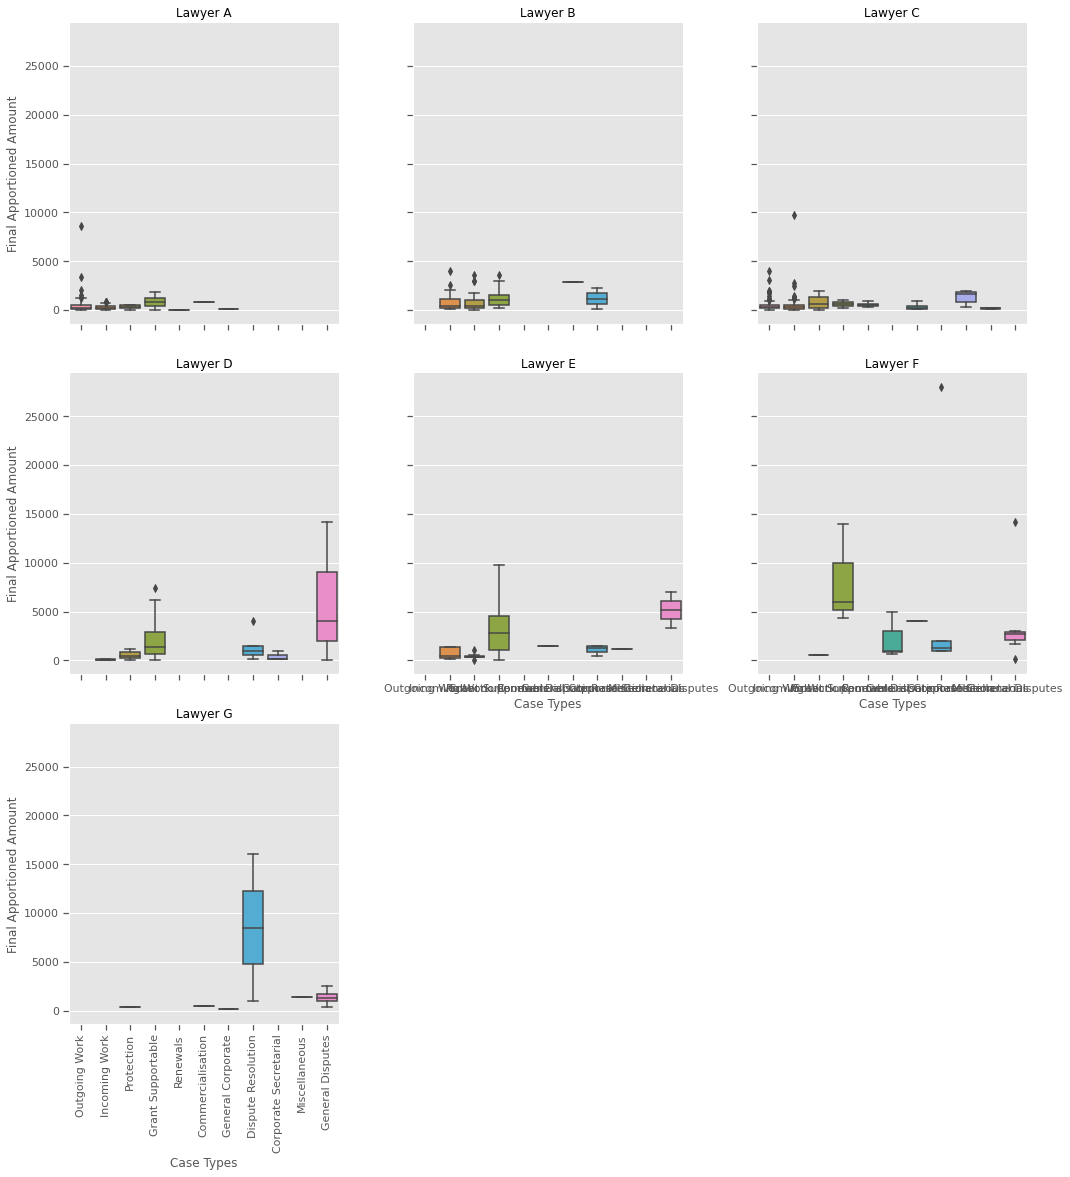

In [28]:
# no idea why the other xticks wont rotate 90 degrees, might have to plot every single one of them individually.

g = sns.catplot(data = apportionment, 
            x = 'Case Type', 
            y = 'Final Apportioned Amount', 
            col = 'User', 
            kind = 'box',
            col_wrap = 3)
g.set_titles('{col_name}')
g.set(xlabel = 'Case Types', ylabel = 'Final Apportioned Amount')
plt.xticks(rotation = 90)
plt.show()

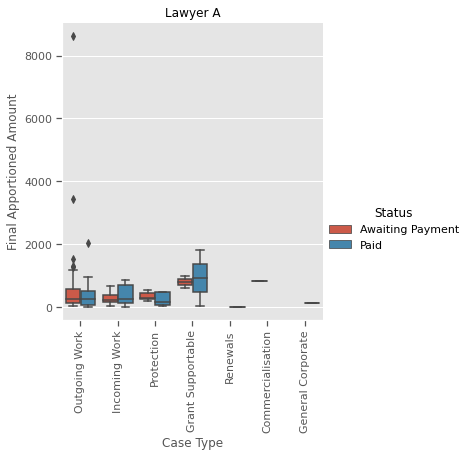

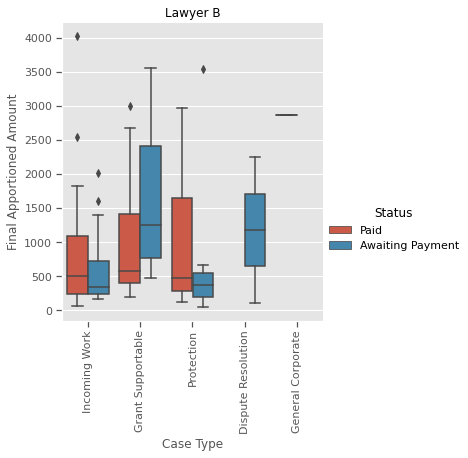

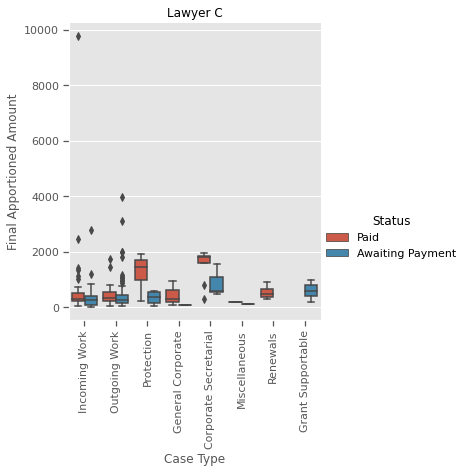

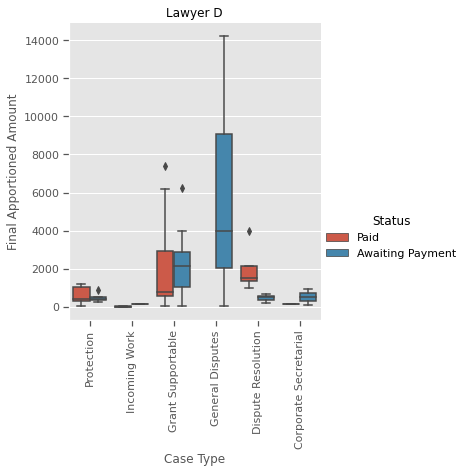

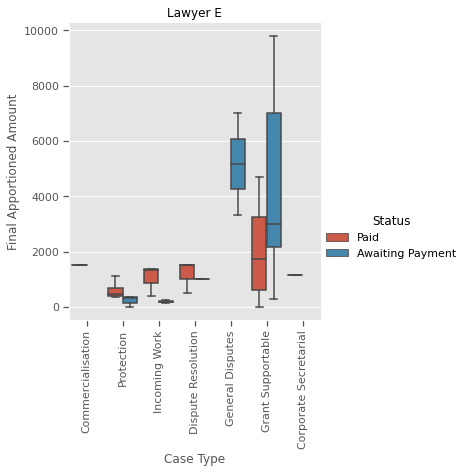

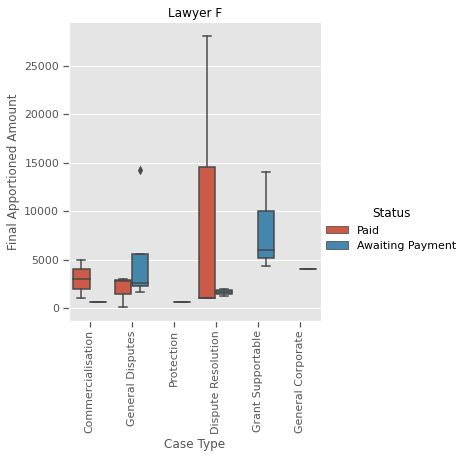

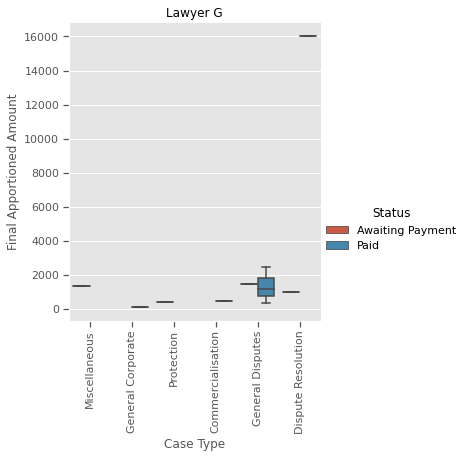

In [29]:
# Initialize a list of lawyers
Lawyers = ['Lawyer A', 'Lawyer B', 'Lawyer C', 'Lawyer D', 'Lawyer E', 'Lawyer F', 'Lawyer G']

# Looping through each lawyers and make a plot
for lawyer in Lawyers:
    l = apportionment[apportionment['User'] == lawyer]
    sns.catplot(data = l, x = 'Case Type', y = 'Final Apportioned Amount', hue = 'Status', kind = 'box').set(title = lawyer)
    plt.xticks( rotation = 90)
    plt.show()

*** insert description of data

#### 2.2. Does clocked time correlate with apportioned amount?

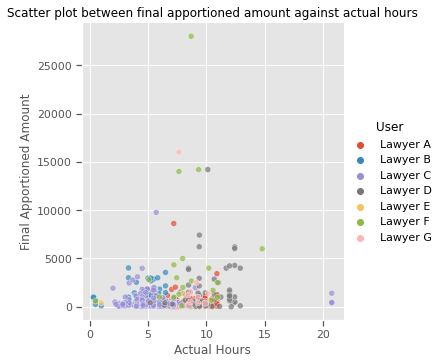

In [35]:
# Merging apportionment table and hours table to investigate relationship between clocked hours and apportioned amount
apportionment_hours = apportionment.merge(hours, left_on = ['Date of Invoice', 'User'], right_on = ['Date', 'User/Full Name'], how = 'outer', suffixes = ['_a','_h'])

# Dropping redudant columns
apportionment_hours = apportionment_hours.drop(['Date', 'User/Full Name'], axis = 1)

# Renaming the column Date of Invoice to Date
apportionment_hours['Date'] = pd.to_datetime(apportionment_hours['Date of Invoice'])

# Scatter plot between final apportioned amount and actual hours
sns.relplot(data = apportionment_hours, y = 'Final Apportioned Amount', x = 'Actual Hours', kind = 'scatter', hue = 'User', alpha = 0.7).set(title = 'Scatter plot between final apportioned amount against actual hours')
plt.show()

In [31]:
# Correlation between final apportioned amount and actual hours
apportionment_hours['Final Apportioned Amount'].corr(apportionment_hours['Actual Hours'])



0.14450891923784936

The above correlation test shows that the final apportioned amount and the actual hours has a very weak positive relationship.

#### 2.3. Do the lawyers achieved their target revenue?

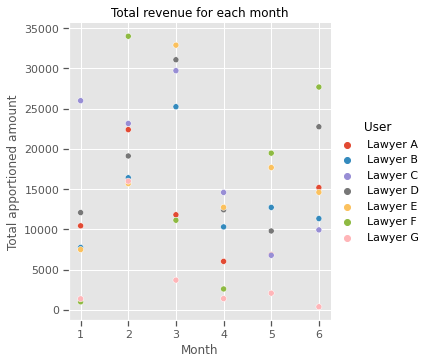

In [49]:
# Grouping the data according to the month and lawyers
apportionment_months = apportionment_hours.groupby([apportionment_hours['Date'].dt.month, 'User']).agg({'Final Apportioned Amount' : 'sum'}).reset_index()

# Plotting the total apportioned amount per month with respect to each lawyers
g = sns.relplot(data = apportionment_months, x = 'Date', y = 'Final Apportioned Amount', hue = 'User').set(title = 'Total revenue for each month', xlabel = 'Month', ylabel = 'Total apportioned amount')
plt.show()
